# US county-level sociodemographic and health resource data (2018-2019)
Sociodemographic and health resource data have been collected by county in the United States and we want to find out if there is any relationship between health resources and sociodemographic data.

To do this, you need to set a target variable (health-related) to conduct the analysis.

In [1]:
# Your code here
import pandas as pd
all_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
all_data.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [2]:
lista_col = all_data.columns.tolist()
print(lista_col)

['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

In [3]:
print(all_data.isnull().sum())


fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64


In [4]:
print(all_data.duplicated().sum())

0


He habaldo con Eli y ella me ha recomendado seleccionar columnas especificas segun el target 

He buscado los datos en la pagina del gob de USA, alli define los features

https://www.census.gov/glossary/

 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active General Surgeons per 100000 Population 2018 (AAMC)', 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)', 'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)', 'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'Percent of Population Aged 60+', 'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'county_pop2018_18 and o
 lder', 'anycondition_prevalence', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'anycondition_number', 'Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Obesity_number', 'Heart disease_prevalence', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'Heart disease_number', 'COPD_prevalence', 'COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number', 'Urban_rural_code


Feature,,
fips,FIPS Code for the Count -- County FIPS Codes are unique 5-digit codes that represent specific US counties. The first two digits represent the county's state and the last three digits represent the county. For example "49017" is the FIPS Code for Garfield County, Utah

TOT_POP,Total Population,This data as well as all Age and Race data is pulled from the 2019 Population Estimates of the US Census

0-9,Population aged 0-9,All of the other age columns are the same but with varying age
0-9 y/o % of total pop,% of the population aged 0-9,
10-19',,
10-19 y/o % of total pop,,
20-29,,
20-29 y/o % of total pop,,
30-39,,
30-39 y/o % of total pop,,
40-49,,
40-49 y/o % of total pop,,
50-59,,
50-59 y/o % of total pop,,
60-69,,
60-69 y/o % of total pop,,
70-79,,
70-79 y/o % of total pop,,
80+,,
80+ y/o % of total pop,,


White-alone pop,Population that is White only,All of the other age columns are the same but with varying age
% White-alone,% o
f population that is White only,
Black-alone pop,,
% Black-alone,,
Native American/American Indian-alone pop,,
% NA/AI-alone,,
Asian-alone pop,,
% Asian-alone,,
Hawaiian/Pacific Islander-alone pop,,
% Hawaiian/PI-alone,,
Two or more races pop,,
% Two or more races,,


N_POP_CHG_2018,Numeric Change in resident total population 7/1/2017 to 7/1/2018,  Numeric population change is the difference between the population of an area at the beginning and end of a time period

GQ_ESTIMATES_2018,7/1/2018 :Includes all people living in group quarters instead of housing units. Group quarters are places where people live or stay, in a group living arrangement, that is owned or managed by an entity or organization providing housing and/or services for the residents,

R_birth_2018,Birth rate in period 7/1/2017 to 6/30/2018, The average annual number of births during a year per 1,000 population
R_death_2018,Death rate in period 7/1/2017 to 6/30/2018,
R_NATURAL_INC_2018,Natural increase rate in period 7/1/2016 to 6/30/2017, The difference between the crude birth rate and the crude death rate, but usually expressed as a percent rather than per 1,000 population

R_INTERNATIONAL_MIG_2018,Net international migration rate in period 7/1/2017 to 6/30/2018,
R_DOMESTIC_MIG_2018,Net domestic migration rate in period 7/1/2017 to 6/30/2018,
R_NET_MIG_2018,Net migration rate in period 7/1/2017 to 6/30/2018,The difference between the number of migrants entering and those leaving a country


Less than a high school diploma 2014-18,"Education variables are self explanatory, first 4 are number and second 4 are %",
High school diploma only 2014-18,,
Some college or associate's degree 2014-18,,
Bachelor's degree or higher 2014-18,,
Percent of adults with less than a high school diploma 2014-18,,
Percent of adults with a high school diploma only 2014-18,,
Percent of adults completing some college or associate's degree 2014-18,,
Percent of adults with a bachelor's degree or higher 2014-18,,


POVALL_2018,Estimate of people of all ages in poverty 2018,
PCTPOVALL_2018,Estimated percent of people of all ages in poverty 2018,
PCTPOV017_2018,Estimated percent of people age 0-17 in poverty 2018,
PCTPOV517_2018,Estimate of related children age 5-17 in families in poverty 2018,
MEDHHINC_2018,Estimate of median household income 2018,
CI90LBINC_2018,90% confidence interval lower bound of estimate of median household income 2018,
CI90UBINC_2018,90% confidence interval upper bound of estimate of median household income 2018,
Civilian_labor_force_2018,Civilian labor force annual average,
Employed_2018,Number employed annual average,
Unemployed_2018,Number unemployed annual average,
Unemployment_rate_2018,Unemployment rate,
Med_HH_Income_Percent_of_State_Total_2018,"County Household Median Income as a percent of the State Total Median Household Income, 2018",



https://www.ncbi.nlm.nih.gov/books/NBK430867/

Active Physicians per 100000 Population 2018 (AAMC),"Total Active Patient Care Physicians per 100,000 Population, 2018 (Assumed identical to state)",
Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),"Active Primary Care Physicians per 100,000 Population, 2018 (Assumed identical to state)",
Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),"Active Patient Care Primary Care Physicians per 100,000 Population, 2018 (Assumed identical to state)",
Active General Surgeons per 100000 Population 2018 (AAMC),"Active General Surgeons per 100,000 Population, 2018 (Assumed identical to state)",
Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),"Active Patient Care General Surgeons per 100,000 Population, 2018 (Assumed identical to state)",
Total nurse practitioners (2019),Total nurses (2019) (Assumed proportion to fraction of state population living in county,
Total physician assistants (2019),Total physical assistants (2019) (Assumed proportion to fraction of state population living in county,
Total Hospitals (2019),Total Hospitals (2019) (Assumed proportion to fraction of state population living in county),
Internal Medicine Primary Care (2019),Active Internal Medicine Primary Care Physicians (2019) (Assumed proportion to fraction of state population living in county),
Family Medicine/General Practice Primary Care (2019),Active Family Medicine/General Practice Primary Care Physicians (2019) (Assumed proportion to fraction of state population living in county),
Total Specialist Physicians (2019),"Sum of Psychiatry, Surgery, Anesthesiology, Emergency Med, Radiology, Cardiology, Oncology, Endocrinology, and Other specialists (2019) (Assumed proportion to fraction of state population living in county",
ICU Beds_x,Number of ICU beds per county,
Population Aged 60+,Population aged 60+,All of the other age columns are the same but with varying age
Percent of Population Aged 60+,% of the population aged 60+,


STATE_FIPS,FIPS Code for the State,
county_pop2018_18 and older,Population aged 18+ per county in 2018,



anycondition_prevalence,A prevalence rate is�the total number of cases of a disease existing in a population divided by the total population.,
Prevalence = (Total number with disease) / (Population at risk for the disease)

anycondition_Lower 95% CI,CI means confidence interval,
anycondition_Upper 95% CI,,
anycondition_number,Population with anycondition,
Obesity_prevalence,,
Obesity_Lower 95% CI,,
Obesity_Upper 95% CI,,
Obesity_number,Population with Obesity,
Heart disease_prevalence,,
Heart disease_Lower 95% CI,,
Heart disease_Upper 95% CI,,
Heart disease_number,Population with Heart Disease,
COPD_prevalence,,
COPD_Lower 95% CI,,
COPD_Upper 95% CI,,
COPD_number,Population with COPD,
diabetes_prevalence,,
diabetes_Lower 95% CI,,
diabetes_Upper 95% CI,,
diabetes_number,Population with diabetes,
CKD_prevalence,,
CKD_Lower 95% CI,,
CKD_Upper 95% CI,,
CKD_number,Population with CKD,


Urban_rural_code,"It distinguishes metropolitan (metro) counties by the population size of their metro area,
 and nonmetropolitan (nonmetro) counties by degree of urbanization and adjacency to a metro area or areas.�",


Eliminate irrelevant information
When we want to prepare the data to train a predictive model, we must answer the following question: are all the features essential to make a prediction? Normally, the answer to that question is a resounding no. We have to try to be as objective as possible and carry out this preliminary process before the feature selection phase. Therefore, here what we will try to do is a controlled elimination of those variables that we can be sure that the algorithm will not use in the predictive process; these are PassengerId, Name, Ticket and Cabin.

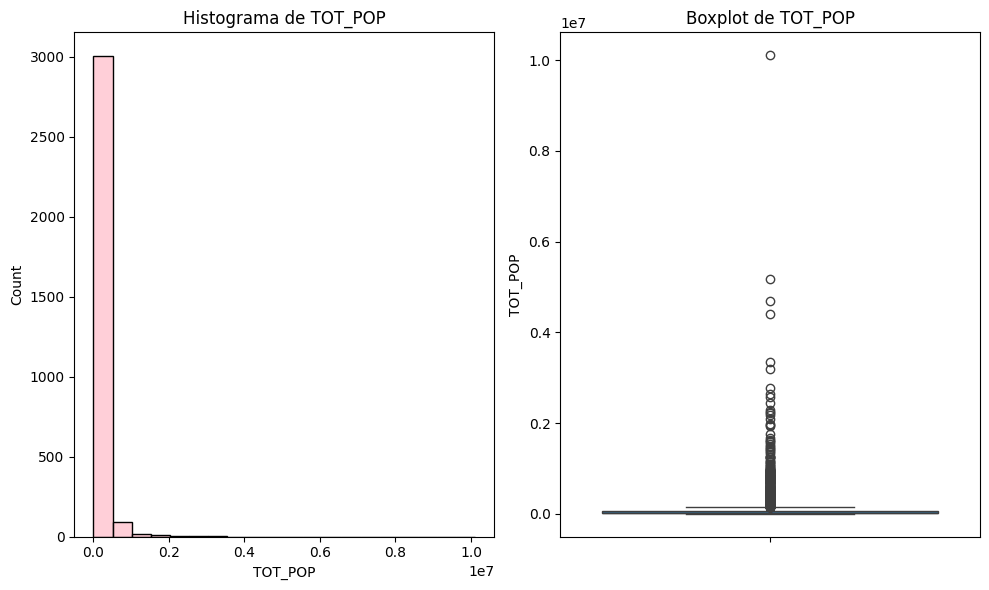

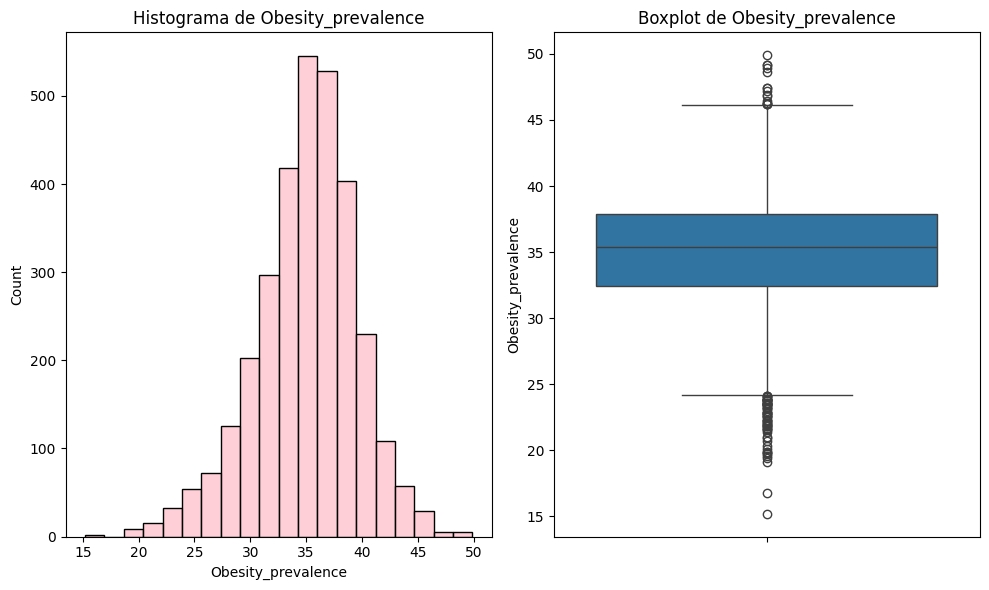

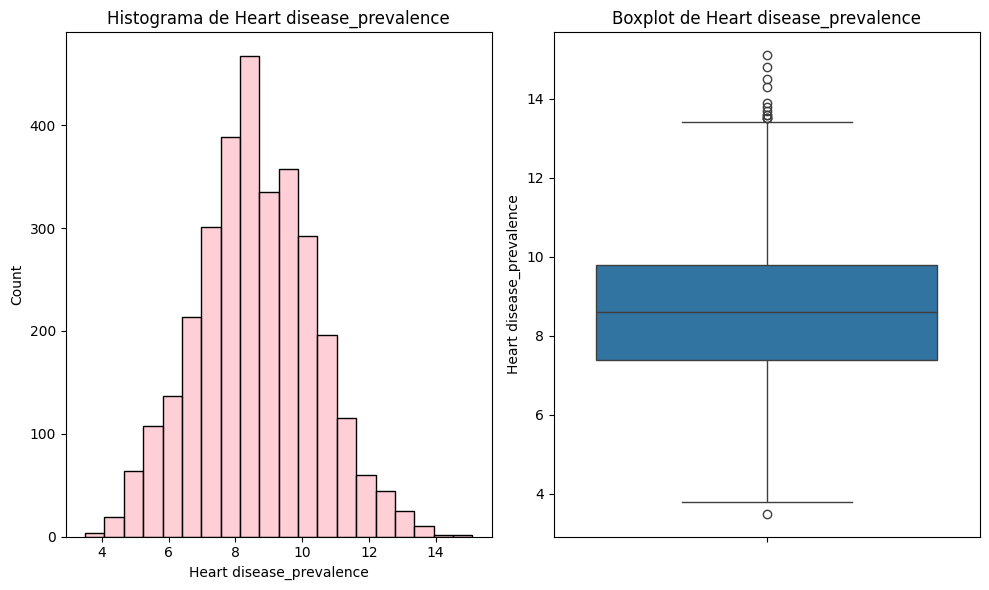

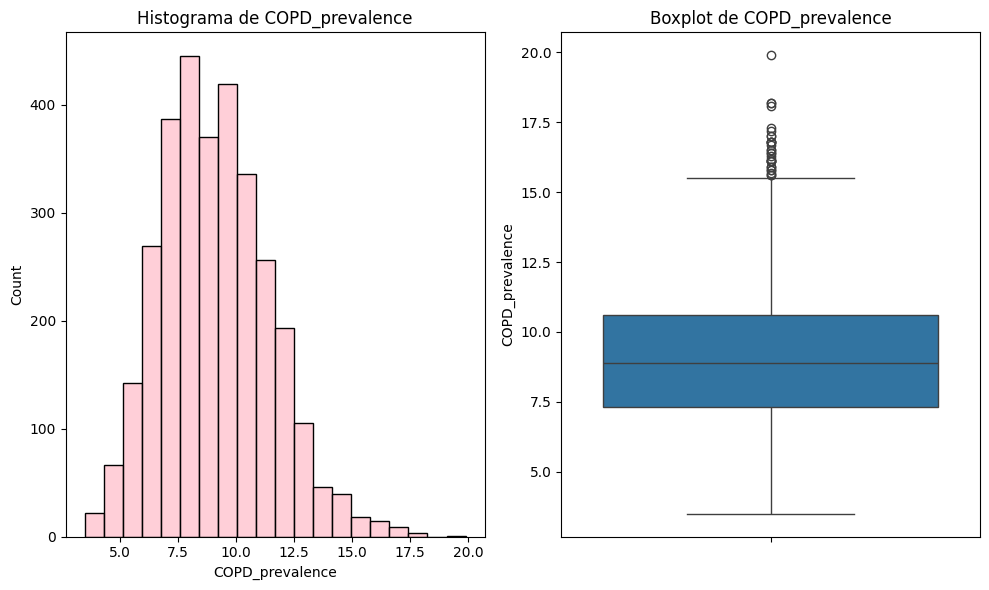

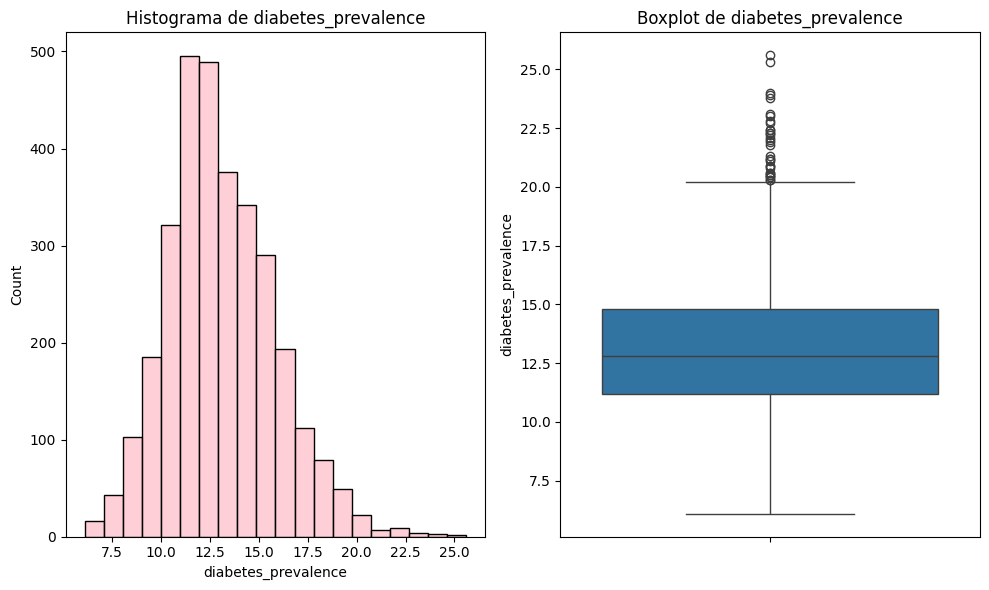

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numericas_col = ['TOT_POP', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence']

for col in numericas_col:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(all_data[col], kde=False, bins=20, color='pink')
    plt.title(f'Histograma de {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=all_data[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

Vemos outliers en los datos, en eeste caso, el rate de prevalencia de diferentes enfermedades
El rate de prevalencia mas alto comparando, es el de obesidad.

In [6]:
#MI IDEA ES ESTUDIRA RECURSOS DE SALUD CONTRA PREVALENCIa de obesidad S ACCROSS USA
#VOU TOMAR COLUNAS 

columnas_relevantes = [
 'Active Physicians per 100000 Population 2018 (AAMC)',
    'Total nurse practitioners (2019)',
    'Total physician assistants (2019)',
    'Total Hospitals (2019)',
    'Internal Medicine Primary Care (2019)',
    'Family Medicine/General Practice Primary Care (2019)',
    'Total Specialist Physicians (2019)',
    'ICU Beds_x',
    'anycondition_prevalence',
    'anycondition_number', 
    'Obesity_prevalence',
    'Obesity_number',  
    'Heart disease_prevalence',
    'Heart disease_number', 
    'COPD_prevalence',
    'COPD_number',  
    'diabetes_prevalence',
    'diabetes_number', 
    'CKD_prevalence',
    'CKD_number', 
    'Urban_rural_code',
    'fips',
    'Total Population'
]
data_relevante = all_data[columnas_relevantes]
print(data_relevante)

      Active Physicians per 100000 Population 2018 (AAMC)  \
0                                                 217.1     
1                                                 217.1     
2                                                 217.1     
3                                                 217.1     
4                                                 217.1     
...                                                 ...     
3135                                              207.9     
3136                                              207.9     
3137                                              207.9     
3138                                              207.9     
3139                                              207.9     

      Total nurse practitioners (2019)  Total physician assistants (2019)  \
0                            28.859137                           6.085786   
1                           113.162114                          23.863512   
2                            12.9142

/tmp/ipykernel_529/860593097.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=all_data, x='Urban_rural_code', palette='viridis')


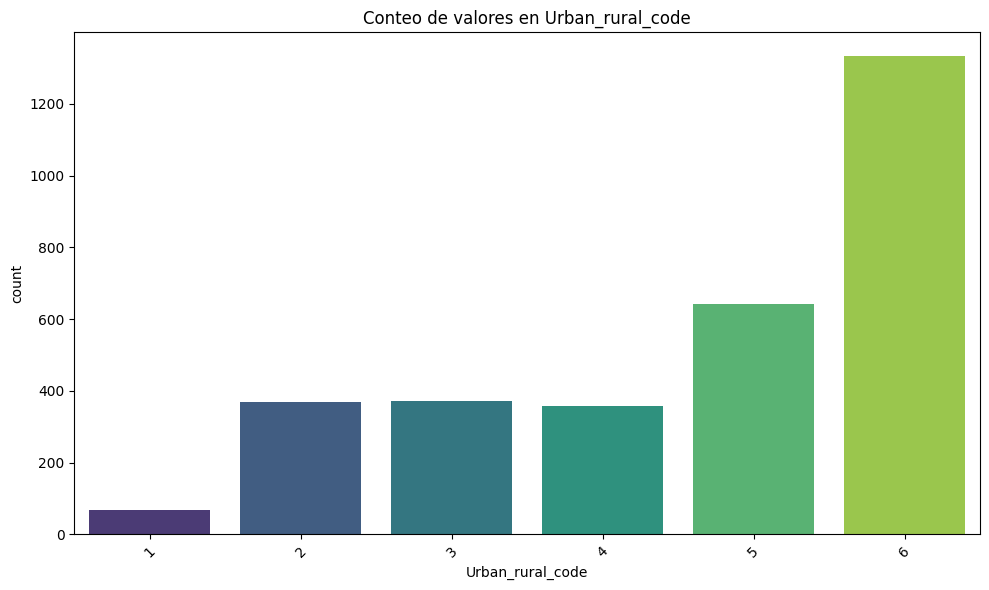

In [7]:
#VARIABLES CATEGORICAS.  
# FIP == COUNTY CODE 
# URBAN RURAL CODE = CODIGO SEGUN NIVEL DE URBANIZACION DE LA POBLACION

plt.figure(figsize=(10, 6))
sns.countplot(data=all_data, x='Urban_rural_code', palette='viridis')
plt.title('Conteo de valores en Urban_rural_code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

No tiene sentido el grafico de FIps ya que representa el codigo ya que es especifico para cada US county - cada county aparece una sola vez

REgarding urban rural code: podemos ver que mas de 1200 counties tiene entre 5 y 20k habitantes urbanos, alrededors de 700 counties tienen 20k habitnates, mientras que casi 1200 counites estan divididos, casi por igual en poblaciones de 250k to 1m, menos de 250k y 20k o mas habitantes.
Hay pocos counties con poblacion urbana de 1m o mas

850 counties son metropolitanos mientras que el resto son no metropolitanos segun definido por el gob USA.

https://www.ers.usda.gov/data-products/rural-urban-continuum-codes.aspx
Metro counties:
1	Counties in metro areas of 1 million population or more
2	Counties in metro areas of 250,000 to 1 million population
3	Counties in metro areas of fewer than 250,000 population
Nonmetro counties:
4	Urban population of 20,000 or more, adjacent to a metro area
5	Urban population of 20,000 or more, not adjacent to a metro area
6	Urban population of 5,000 to 20,000, adjacent to a metro area
7	Urban population of 5,000 to 20,000, not adjacent to a metro area
8	Urban population of fewer than 5,000, adjacent to a metro area
9	Urban population of fewer than 5,000, not adjacent to a metro area

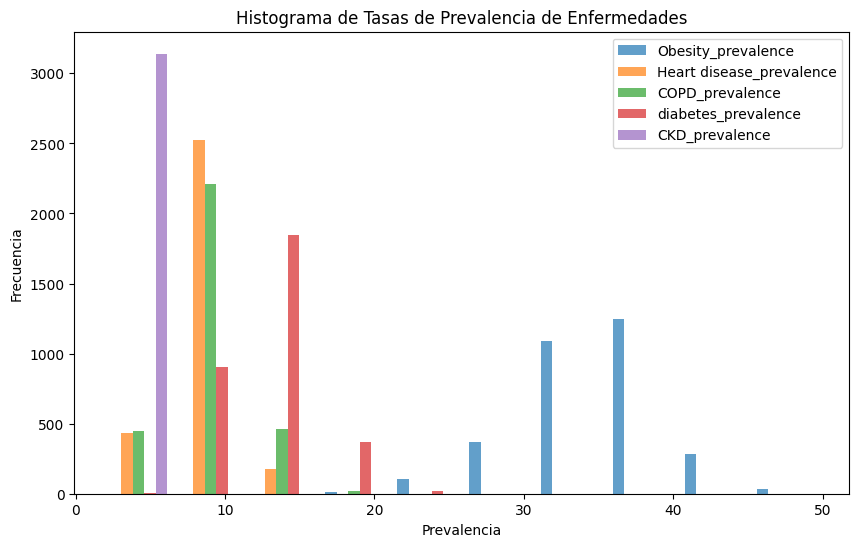

In [8]:
import matplotlib.pyplot as plt

# MIRO . PREVALENCICIA DE TODAS ENFERMEDADes LISTADAs
#Prevalence rate= (Total number with disease) / (Population at risk for the disease)


data_prevalence = all_data[['Obesity_prevalence', 
                            'Heart disease_prevalence', 'COPD_prevalence', 
                            'diabetes_prevalence', 'CKD_prevalence']]

# Plot histogram de cada col
plt.figure(figsize=(10, 6))
plt.hist(data_prevalence.values, bins=10, alpha=0.7, label=data_prevalence.columns)

plt.title('Histograma de Tasas de Prevalencia de Enfermedades')
plt.xlabel('Prevalencia')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Prevalence rate= (Total number with disease) / (Population at risk for the disease)

Como hemos mencionado antes, la obesisdad tiene el rate mas alto de prevalencia, o sea mas casos sobre el mismo numero de la poblacion - en la mayoria d elos condados, entre 30 y poco mas de cuarenta.
Pulmonary desease (COPD) and heart disease, tienen en la maayoria de los condados, un rate menor a 10
Kidney conditions tiene un prevalencia de menos de 10 en todos los condados.
Con respecto a la diabetes, la mayorai de lso condados presenta una prevalencia de entre 10 y 15


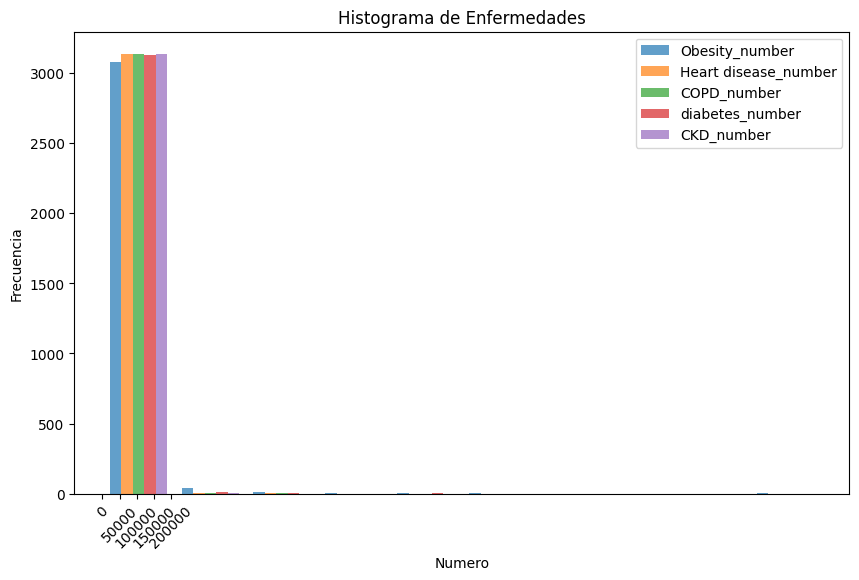

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np 

# MIRO . numero de casos DE TODAS ENFERMEDADes LISTADAs


data_enfermedades = all_data[['Obesity_number', 
                            'Heart disease_number', 'COPD_number', 
                            'diabetes_number', 'CKD_number']]

# Plot histogram de cada col
plt.figure(figsize=(10, 6))
plt.hist(data_enfermedades.values, bins=10, alpha=0.7, label=data_enfermedades.columns)

plt.title('Histograma de Enfermedades')
plt.xlabel('Numero')
plt.ylabel('Frecuencia')
plt.legend()

plt.xticks(np.arange(0, 200001, 50000))
#plt.xticks(range(0, int(data_enfermedades.max().max()) + 50000, 50000), rotation=45)
#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.show()

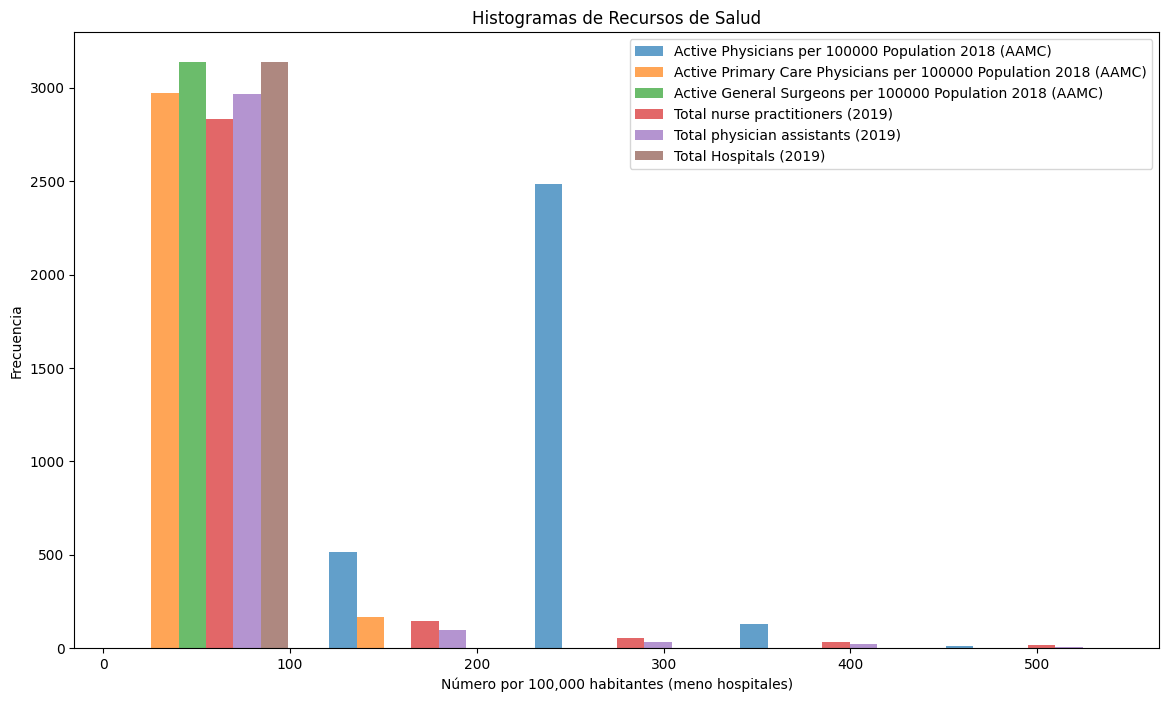

In [10]:
data_healthcare = all_data[['Active Physicians per 100000 Population 2018 (AAMC)',
                            'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
                            'Active General Surgeons per 100000 Population 2018 (AAMC)',
                            'Total nurse practitioners (2019)',
                            'Total physician assistants (2019)',
                            'Total Hospitals (2019)']]

# Plot histogram for each column
plt.figure(figsize=(14, 8))
plt.hist(data_healthcare.values, bins=5, alpha=0.7, label=data_healthcare.columns, range=(0, 550))

plt.title('Histogramas de Recursos de Salud')
plt.xlabel('Número por 100,000 habitantes (meno hospitales)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Analizando la disponibilidad de recursos medicos sanitarios en los condados vemos que:
En la mayoria de lo scondados hay menos de 100 hospitales
En 2500 de los poco mas de 300o condadados, hay alrededor de 250 physicians




https://www.aamc.org/data-reports/data/2023-key-findings-and-definitions#commonlyused

Active Physicians: Physicians licensed by one of the 50 U.S. states, the District of Columbia, Puerto Rico, Guam, American Samoa, U.S. Virgin Islands, and the Northern Mariana Islands are considered active, provided they work more than 20 hours per week
Active patient care physicians: This group is a subset of active physicians. It comprises only those physicians whose self-reported practice is direct patient care

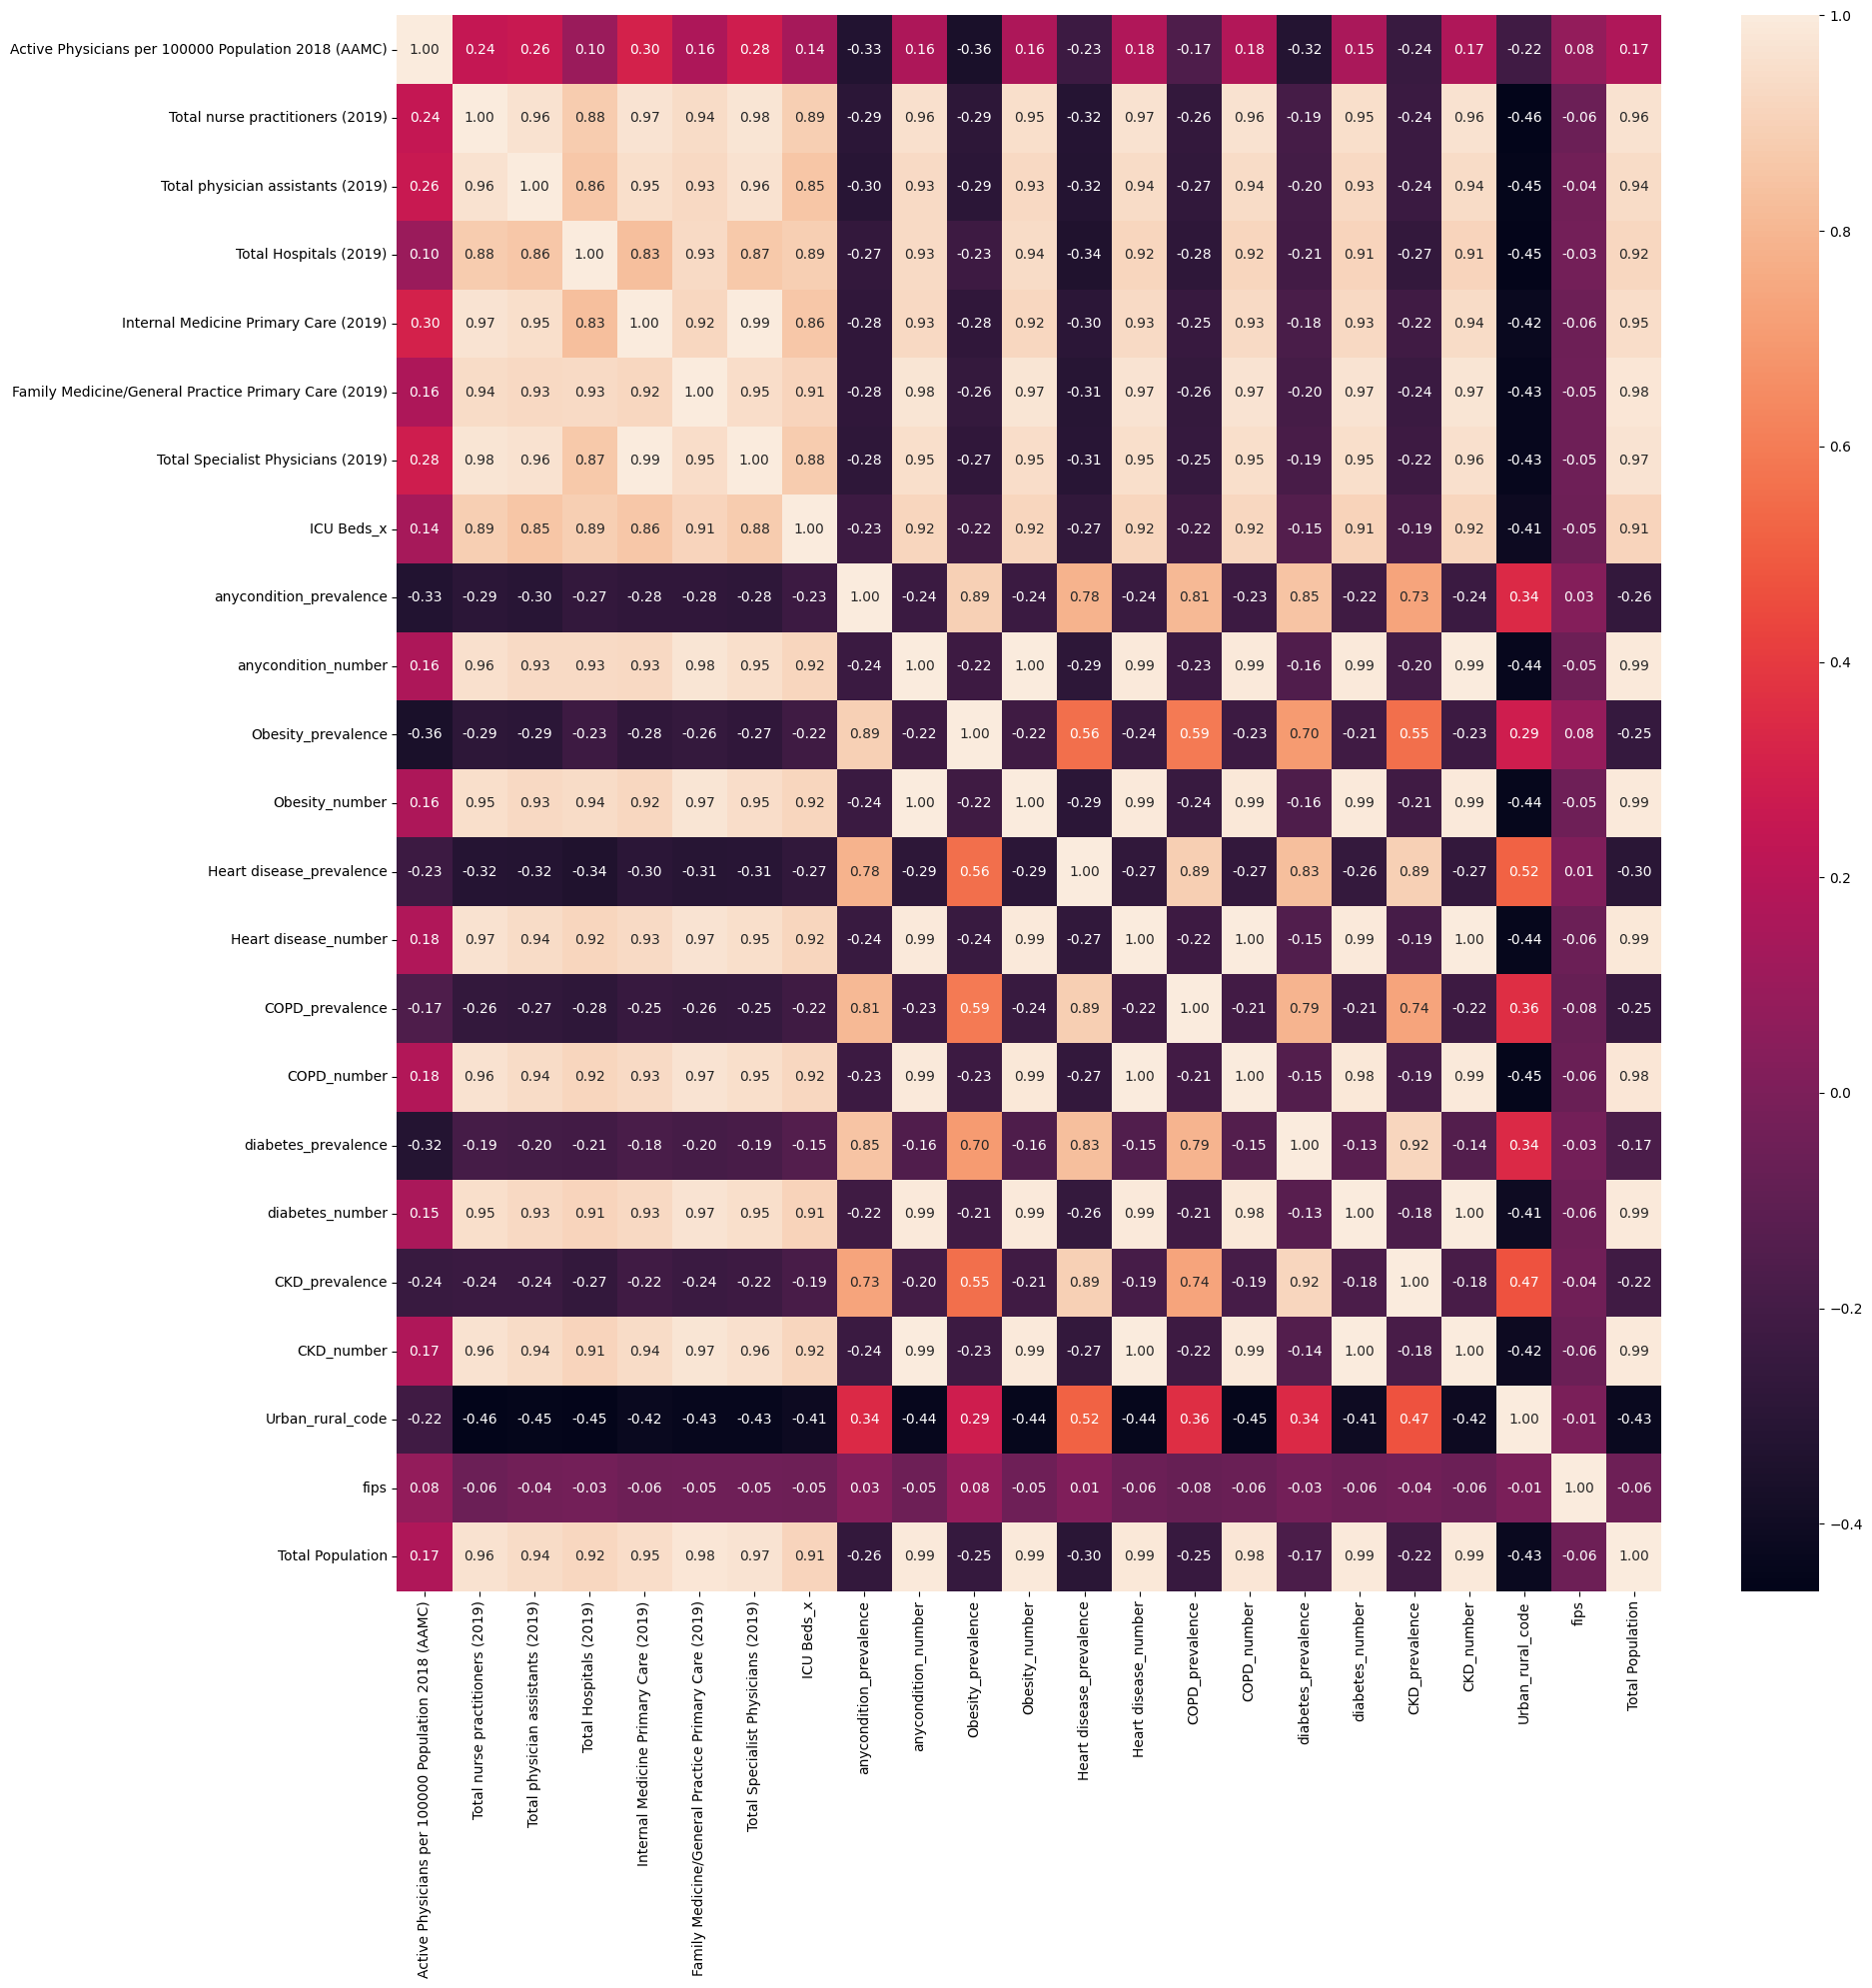

In [11]:
#numerical e categorical 


fig, axis = plt.subplots(figsize= (20, 20))
sns.heatmap(data_relevante[['Active Physicians per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)',
    'Total physician assistants (2019)',
    'Total Hospitals (2019)',
    'Internal Medicine Primary Care (2019)',
    'Family Medicine/General Practice Primary Care (2019)',
    'Total Specialist Physicians (2019)',
    'ICU Beds_x',
    'anycondition_prevalence',
    'anycondition_number', 'Obesity_prevalence',
    'Obesity_number',  'Heart disease_prevalence',
    'Heart disease_number', 'COPD_prevalence',
    'COPD_number','diabetes_prevalence',
    'diabetes_number', 'CKD_prevalence',
    'CKD_number', 'Urban_rural_code',
    'fips',
    'Total Population' ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [12]:
data_relevante = data_relevante.drop(['anycondition_prevalence','anycondition_number'], axis=1)

In [13]:
data_relevante.describe()

,Active Physicians per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Obesity_prevalence,Obesity_number,...,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code,fips,Total Population
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03
mean,254.923567,52.698009,28.215940,1.655299,62.898806,44.393892,167.332629,23.817516,35.019299,2.527613e+04,...,5597.593312,9.095223,5827.242357,13.073503,9326.577707,3.446242,2466.234076,4.635350,30401.640764,1.022266e+05
std,42.291759,153.878850,86.409281,4.293436,214.737693,133.348667,543.035916,84.602028,4.517088,7.446684e+04,...,15615.285499,2.344965,15720.551934,2.724351,29754.601185,0.568059,7730.422067,1.510447,15150.559265,3.283878e+05
min,191.300000,0.025524,0.009726,0.001363,0.046773,0.030356,0.111759,0.000000,15.200000,2.500000e+01,...,7.000000,3.500000,7.000000,6.100000,11.000000,1.800000,3.000000,1.000000,1001.000000,7.400000e+01
25%,227.600000,5.439135,2.475921,0.248797,4.843825,5.312558,14.740077,0.000000,32.400000,3.075000e+03,...,798.500000,7.300000,815.000000,11.200000,1187.750000,3.100000,314.750000,3.000000,18180.500000,1.096700e+04
50%,247.100000,13.076544,5.969606,0.524404,12.386405,12.153987,36.223582,0.000000,35.400000,7.182500e+03,...,1814.500000,8.900000,1963.500000,12.800000,2743.000000,3.400000,718.000000,5.000000,29178.000000,2.570400e+04
75%,278.800000,35.215580,18.598497,1.311585,36.902489,31.312501,103.869345,12.000000,37.900000,1.854250e+04,...,4376.000000,10.600000,4727.000000,14.800000,6679.250000,3.800000,1776.250000,6.000000,45081.500000,6.750075e+04
max,847.000000,3937.767709,2022.531916,91.712638,5713.007608,3882.586846,15014.048660,2126.000000,49.900000,2.097906e+06,...,434790.000000,19.900000,434075.000000,25.600000,952335.000000,6.200000,237766.000000,6.000000,56045.000000,1.010572e+07


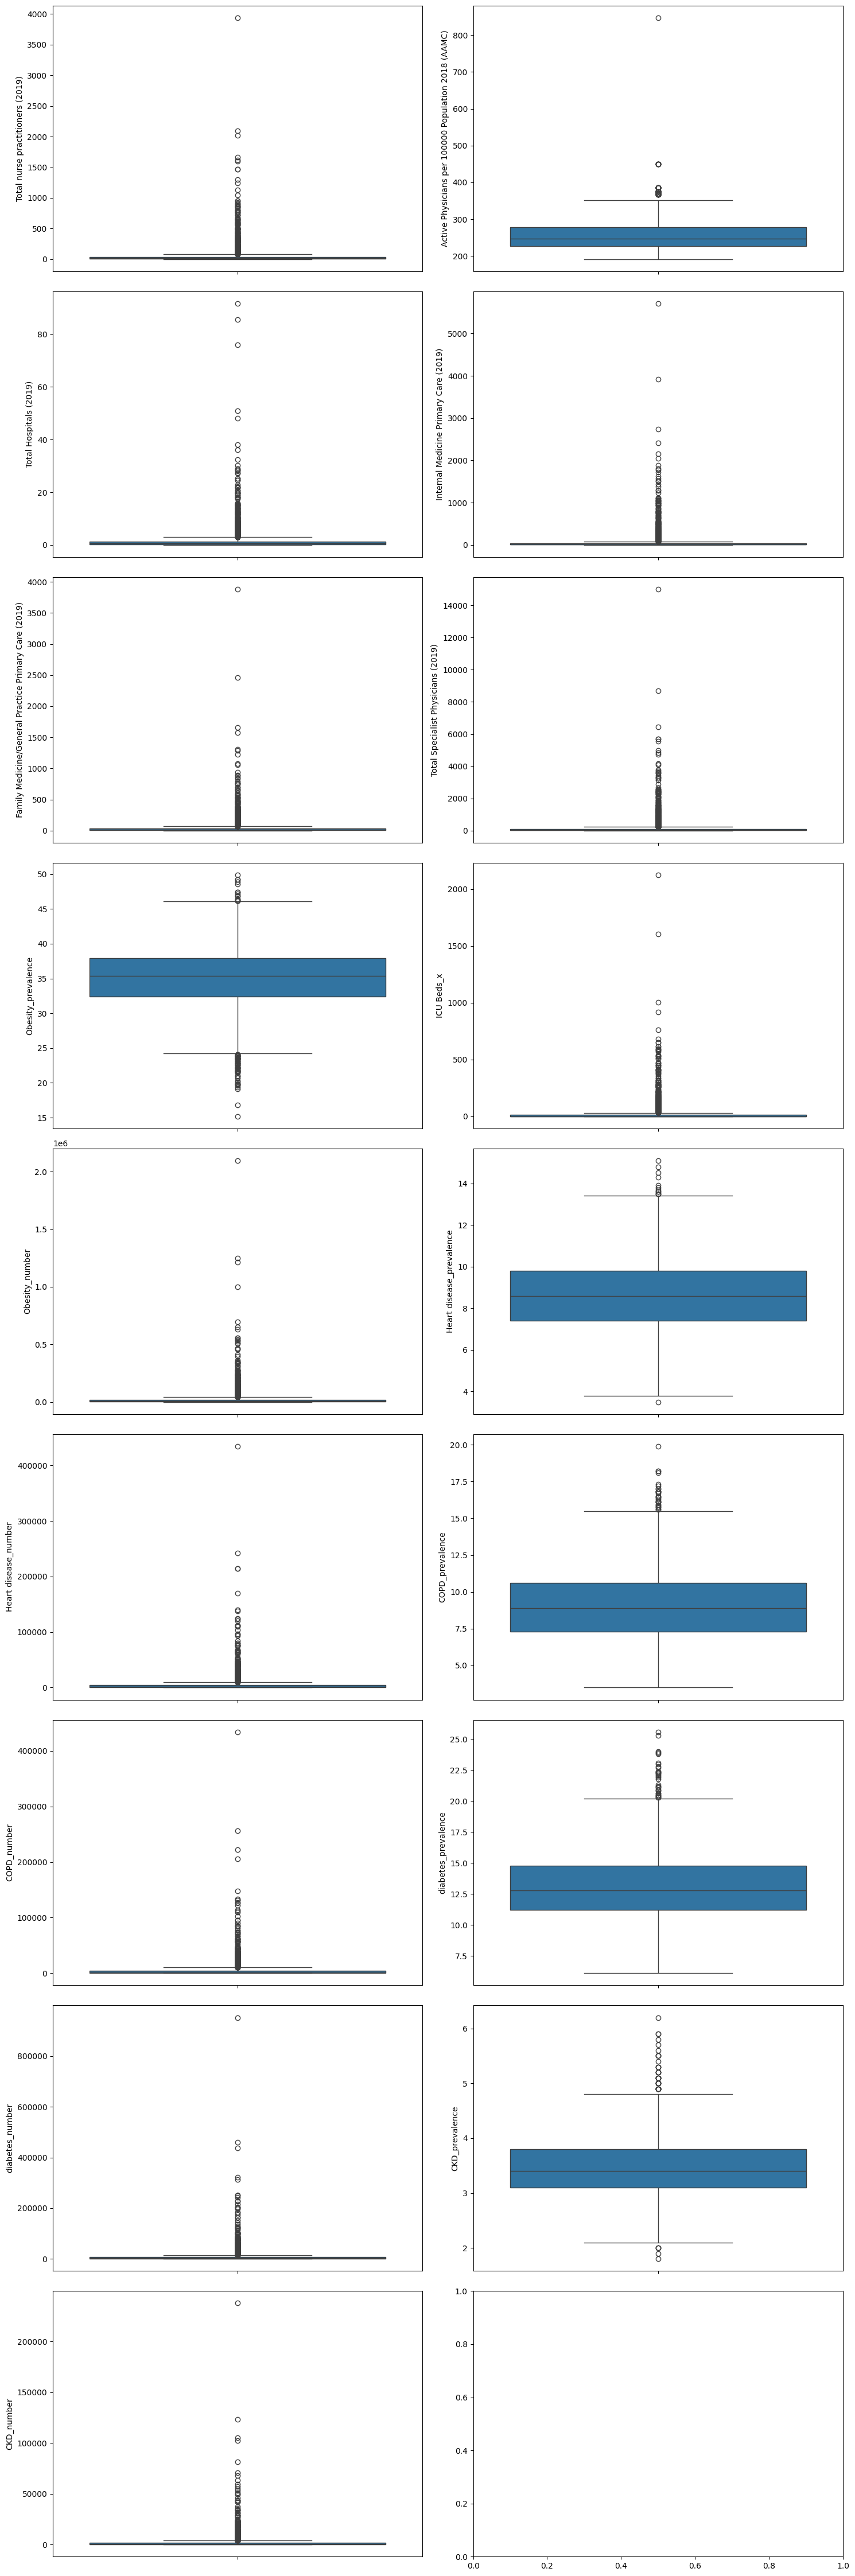

In [14]:
#Olhamos dados e graficos para análise de outliers




fig, axis = plt.subplots(9, 2, figsize=(15, 45))

sns.boxplot(ax=axis[0, 0], data=data_relevante, y="Total nurse practitioners (2019)")
sns.boxplot(ax=axis[0, 1], data=data_relevante, y="Active Physicians per 100000 Population 2018 (AAMC)")
sns.boxplot(ax=axis[1, 0], data=data_relevante, y="Total Hospitals (2019)")
sns.boxplot(ax=axis[1, 1], data=data_relevante, y="Internal Medicine Primary Care (2019)")
sns.boxplot(ax=axis[2, 0], data=data_relevante, y="Family Medicine/General Practice Primary Care (2019)")
sns.boxplot(ax=axis[2, 1], data=data_relevante, y="Total Specialist Physicians (2019)")
sns.boxplot(ax=axis[3, 0], data=data_relevante, y="Obesity_prevalence")
sns.boxplot(ax=axis[3, 1], data=data_relevante, y="ICU Beds_x")
sns.boxplot(ax=axis[4, 0], data=data_relevante, y="Obesity_number")
sns.boxplot(ax=axis[4, 1], data=data_relevante, y="Heart disease_prevalence")
sns.boxplot(ax=axis[5, 0], data=data_relevante, y="Heart disease_number")
sns.boxplot(ax=axis[5, 1], data=data_relevante, y="COPD_prevalence")
sns.boxplot(ax=axis[6, 0], data=data_relevante, y="COPD_number")
sns.boxplot(ax=axis[6, 1], data=data_relevante, y="diabetes_prevalence")
sns.boxplot(ax=axis[7, 0], data=data_relevante, y="diabetes_number")
sns.boxplot(ax=axis[7, 1], data=data_relevante, y="CKD_prevalence")
sns.boxplot(ax=axis[8, 0], data=data_relevante, y="CKD_number")
plt.tight_layout()

plt.show()

Todos tienen outliers, veremos caso a caso

In [15]:
#Stats de nurses
nurses_stats = data_relevante["Total nurse practitioners (2019)"].describe()
nurses_stats

count    3140.000000
mean       52.698009
std       153.878850
min         0.025524
25%         5.439135
50%        13.076544
75%        35.215580
max      3937.767709
Name: Total nurse practitioners (2019), dtype: float64

In [16]:
# IQR for  nurses
nurses_iqr = nurses_stats["75%"] - nurses_stats["25%"]
upper_limit = nurses_stats["75%"] + 1.5 * nurses_iqr
lower_limit = nurses_stats["25%"] - 1.5 * nurses_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nurses_iqr, 2)}")

The upper and lower limits for finding outliers are 79.88 and -39.23, with an interquartile range of 29.78


In [17]:
#filtro

filtro = data_relevante[data_relevante["Total nurse practitioners (2019)"] > 80]
cuenta = len(filtro)
porcentaje = (cuenta / len(data_relevante)) * 100

print(f"Percentage of total: {porcentaje:.2f}%")

Percentage of total: 13.47%


Como los outliers son mas de un 13% del todal de datos, no los borramos

In [18]:
#Veo los outliers de Total Hospitals (2019)

hospital_stats = data_relevante["Total Hospitals (2019)"].describe()
hospital_stats

count    3140.000000
mean        1.655299
std         4.293436
min         0.001363
25%         0.248797
50%         0.524404
75%         1.311585
max        91.712638
Name: Total Hospitals (2019), dtype: float64

In [19]:
hospital_iqr = hospital_stats["75%"] - hospital_stats["25%"]
upper_limit = hospital_stats["75%"] + 1.5 * hospital_iqr
lower_limit = hospital_stats["25%"] - 1.5 * hospital_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hospital_iqr, 2)}")

The upper and lower limits for finding outliers are 2.91 and -1.35, with an interquartile range of 1.06


In [20]:
filtro_h = data_relevante[data_relevante["Total Hospitals (2019)"] > 3]
cuenta = len(filtro_h)
porcentaje = (cuenta / len(data_relevante)) * 100

print(f"Percentage of total: {porcentaje:.2f}%")

Percentage of total: 12.01%


Como los outliers son mas de un 12% del todal de datos, no los borramos

In [21]:
#Family Medicine/General Practice Primary Care (2019)

Family_Medicine_stats = data_relevante["Family Medicine/General Practice Primary Care (2019)"].describe()
Family_Medicine_stats

fm_iqr = Family_Medicine_stats["75%"] - Family_Medicine_stats["25%"]
upper_limit = Family_Medicine_stats["75%"] + 1.5 * fm_iqr
lower_limit = Family_Medicine_stats["25%"] - 1.5 * fm_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(fm_iqr, 2)}")

The upper and lower limits for finding outliers are 70.31 and -33.69, with an interquartile range of 26.0


In [22]:
filtro_fm = data_relevante[data_relevante["Family Medicine/General Practice Primary Care (2019)"] > 71]
cuenta = len(filtro_fm)
porcentaje = (cuenta / len(data_relevante)) * 100

print(f"Percentage of total: {porcentaje:.2f}%")

Percentage of total: 13.18%


Como los outliers son mas de un 12% del todal de datos, no los borramos

In [23]:
#ICU Beds_x
ICU_Beds_x_stats = data_relevante["ICU Beds_x"].describe()
ICU_Beds_x_stats

icu_iqr = ICU_Beds_x_stats["75%"] - ICU_Beds_x_stats["25%"]
upper_limit = ICU_Beds_x_stats["75%"] + 1.5 * icu_iqr
lower_limit = ICU_Beds_x_stats["25%"] - 1.5 * icu_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(icu_iqr, 2)}")

The upper and lower limits for finding outliers are 30.0 and -18.0, with an interquartile range of 12.0


In [24]:
filtro_icu = data_relevante[data_relevante["Family Medicine/General Practice Primary Care (2019)"] > 30]
cuenta = len(filtro_icu)
porcentaje = (cuenta / len(data_relevante)) * 100

print(f"Percentage of total: {porcentaje:.2f}%")

Percentage of total: 25.61%


Como los outliers son mas de un 25% del todal de datos, no los borramos

In [25]:
#"Obesity_prevalence"
Obesity_prevalence_stats = data_relevante["Obesity_prevalence"].describe()
Obesity_prevalence_stats

op_iqr = Obesity_prevalence_stats["75%"] - Obesity_prevalence_stats["25%"]
upper_limit = Obesity_prevalence_stats["75%"] + 1.5 * op_iqr
lower_limit = Obesity_prevalence_stats["25%"] - 1.5 * op_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(op_iqr, 2)}")

The upper and lower limits for finding outliers are 46.15 and 24.15, with an interquartile range of 5.5


In [26]:
filtro_op = data_relevante[data_relevante["Obesity_prevalence"] > 47]
cuenta = len(filtro_op)
porcentaje = (cuenta / len(data_relevante)) * 100

print(f"Percentage of total: {porcentaje:.2f}%")

Percentage of total: 0.25%


In [27]:
data_relevante = data_relevante[data_relevante["Obesity_prevalence"] <= 47]

Como los outliers son menos del 0.25% del todal de datos, dropeamos

In [28]:
#"Heart disease_prevalence"
hd_prevalence_stats = data_relevante["Heart disease_prevalence"].describe()
hd_prevalence_stats

hd_iqr = hd_prevalence_stats["75%"] - hd_prevalence_stats["25%"]
upper_limit = hd_prevalence_stats["75%"] + 1.5 * hd_iqr
lower_limit = hd_prevalence_stats["25%"] - 1.5 * hd_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hd_iqr, 2)}")

The upper and lower limits for finding outliers are 13.4 and 3.8, with an interquartile range of 2.4


In [29]:
filtro_hd = data_relevante[data_relevante["Heart disease_prevalence"] > 14]
cuenta = len(filtro_hd)
porcentaje = (cuenta / len(data_relevante)) * 100

print(f"Percentage of total: {porcentaje:.2f}%")

Percentage of total: 0.13%


Como los outliers son menos del 0.13% del todal de datos, dropeamos

In [30]:
data_relevante = data_relevante[data_relevante["Heart disease_prevalence"] <= 14]

In [31]:
#"COPD_prevalence"

COPD_prevalence_stats = data_relevante["COPD_prevalence"].describe()
COPD_prevalence_stats

copd_iqr = COPD_prevalence_stats["75%"] - COPD_prevalence_stats["25%"]
upper_limit = COPD_prevalence_stats["75%"] + 1.5 * copd_iqr
lower_limit = COPD_prevalence_stats["25%"] - 1.5 * copd_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(copd_iqr, 2)}")

The upper and lower limits for finding outliers are 15.55 and 2.35, with an interquartile range of 3.3


In [32]:
filtro_copd = data_relevante[data_relevante["COPD_prevalence"] > 16]
cuenta = len(filtro_copd)
porcentaje = (cuenta / len(data_relevante)) * 100

print(f"Percentage of total: {porcentaje:.2f}%")

Percentage of total: 0.67%


Dropeo los outliers

In [33]:
data_relevante = data_relevante[data_relevante["COPD_prevalence"] <= 16]

In [34]:
# "diabetes_prevalence"

dia_prevalence_stats = data_relevante["diabetes_prevalence"].describe()
dia_prevalence_stats

dia_iqr = dia_prevalence_stats["75%"] - dia_prevalence_stats["25%"]
upper_limit = dia_prevalence_stats["75%"] + 1.5 * dia_iqr
lower_limit = dia_prevalence_stats["25%"] - 1.5 * dia_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(dia_iqr, 2)}")

The upper and lower limits for finding outliers are 19.95 and 5.95, with an interquartile range of 3.5


In [35]:
filtro_dia = data_relevante[data_relevante["diabetes_prevalence"] > 20]
cuenta = len(filtro_dia)
porcentaje = (cuenta / len(data_relevante)) * 100

print(f"Percentage of total: {porcentaje:.2f}%")

Percentage of total: 0.90%


We drop the outliers

In [36]:
data_relevante = data_relevante[data_relevante["diabetes_prevalence"] <= 20]

In [37]:
# "CKD_prevalence"
ckd_prevalence_stats = data_relevante["CKD_prevalence"].describe()
ckd_prevalence_stats

count    3079.000000
mean        3.419065
std         0.533994
min         1.800000
25%         3.100000
50%         3.400000
75%         3.800000
max         5.300000
Name: CKD_prevalence, dtype: float64

In [38]:


ckd_iqr = ckd_prevalence_stats["75%"] - ckd_prevalence_stats["25%"]
upper_limit = ckd_prevalence_stats["75%"] + 1.5 * ckd_iqr
lower_limit = ckd_prevalence_stats["25%"] - 1.5 * ckd_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(ckd_iqr, 2)}")

The upper and lower limits for finding outliers are 4.85 and 2.05, with an interquartile range of 0.7


In [39]:
filtro_ckd = data_relevante[data_relevante["CKD_prevalence"] > 5]
cuenta = len(filtro_ckd)
porcentaje = (cuenta / len(data_relevante)) * 100

print(f"Percentage of total: {porcentaje:.2f}%")

Percentage of total: 0.23%


dropeo los outliers

In [40]:
data_relevante = data_relevante[data_relevante["CKD_prevalence"] <= 5]

In [41]:
#MODELO REGRESION PRIMERO - separo en train y test
from sklearn.model_selection import train_test_split

X = data_relevante.drop(columns=["Obesity_prevalence"])
y = data_relevante["Obesity_prevalence"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Active Physicians per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code,fips,Total Population
379,265.2,12.547829,6.185592,0.220298,11.771203,8.405827,29.545263,6,6492,10.6,1822,12.8,2210,15.0,2596,3.9,680,6,12123,22350
3139,207.9,3.448908,1.941518,0.349714,1.591804,4.534229,6.560161,0,1899,8.5,471,8.7,480,11.7,644,3.4,185,6,56045,7117
2386,240.4,1.028313,0.878306,0.123919,0.736994,1.176147,2.082715,0,517,10.7,157,8.4,124,13.1,193,4.0,58,6,46055,2084
2344,229.5,7.151313,3.536882,0.232645,7.205259,7.893080,21.754017,0,5804,9.3,1270,10.3,1408,18.6,2548,4.5,614,6,45061,17897
1611,247.1,53.078451,41.177925,5.897606,36.228149,61.819545,121.322174,8,20395,4.7,4209,4.6,4082,6.8,6052,2.2,1955,5,30031,100733


In [42]:
#SCALING DE DATOS
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


print(X_train_scaled.head())

      Active Physicians per 100000 Population 2018 (AAMC)  \
379                                            0.112704     
3139                                           0.025316     
2386                                           0.074882     
2344                                           0.058258     
1611                                           0.085100     

      Total nurse practitioners (2019)  Total physician assistants (2019)  \
379                           0.003173                           0.003043   
3139                          0.000863                           0.000945   
2386                          0.000248                           0.000419   
2344                          0.001803                           0.001733   
1611                          0.013466                           0.020345   

      Total Hospitals (2019)  Internal Medicine Primary Care (2019)  \
379                 0.002372                               0.002050   
3139                0.003783

In [43]:
# seleccionar las mejores features

from sklearn.feature_selection import f_classif, SelectKBest, f_regression

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train_scaled, y_train)

ix = selection_model.get_support()
X_train_selection = pd.DataFrame(selection_model.transform(X_train_scaled), columns= X_train_scaled.columns.values[ix])
X_test_selection = pd.DataFrame(selection_model.transform(X_test_scaled), columns= X_test_scaled.columns.values[ix])

X_train_selection.head()

,Active Physicians per 100000 Population 2018 (AAMC),Total physician assistants (2019),Heart disease_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence
0,0.112704,0.003043,0.696078,0.743802,0.640288,0.65625
1,0.025316,0.000945,0.490196,0.404959,0.402878,0.50000
2,0.074882,0.000419,0.705882,0.380165,0.503597,0.68750
3,0.058258,0.001733,0.568627,0.537190,0.899281,0.84375
4,0.085100,0.020345,0.117647,0.066116,0.050360,0.12500


In [44]:
X_train_selection["Obesity_prevalence"] = list(y_train)
X_test_selection["Obesity_prevalence"] = list(y_test)

X_train_selection.to_csv("../data/processed/clean_train.csv", index = False)
X_test_selection.to_csv("../data/processed/clean_test.csv", index = False)

In [45]:
#M

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Active Physicians per 100000 Population 2018 (AAMC),Total physician assistants (2019),Heart disease_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Obesity_prevalence
0,0.112704,0.003043,0.696078,0.743802,0.640288,0.65625,37.6
1,0.025316,0.000945,0.490196,0.404959,0.402878,0.50000,34.4
2,0.074882,0.000419,0.705882,0.380165,0.503597,0.68750,35.2
3,0.058258,0.001733,0.568627,0.537190,0.899281,0.84375,42.4
4,0.085100,0.020345,0.117647,0.066116,0.050360,0.12500,22.8


In [46]:
#REMUEVO OBESITY PREV DE LOS SETS

X_train = train_data.drop(["Obesity_prevalence"], axis = 1)
y_train = train_data["Obesity_prevalence"]
X_test = test_data.drop(["Obesity_prevalence"], axis = 1)
y_test = test_data["Obesity_prevalence"]

In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# After the training process, we can know the parameters (variables
# that the model has fitted:

print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 29.363135746170215
Coefficients (b1, b2): [ -5.14354835 -16.23091744   6.16659219  -0.97141479  26.52797901
 -18.68994773]


In [50]:
#predecimos
y_pred = model.predict(X_test)
y_pred

array([35.76199182, 33.54598973, 42.5809262 , 32.3588154 , 29.48080979,
       32.8469048 , 36.21221108, 37.89053358, 36.52678884, 35.02156133,
       32.02714641, 34.31841756, 33.15354001, 34.78083611, 38.8898529 ,
       32.01519201, 40.63183602, 36.80208509, 32.38009043, 37.59959906,
       31.95451016, 42.52368502, 32.27658355, 35.13041995, 28.89452218,
       38.99373314, 35.8295373 , 36.33277794, 29.72344898, 29.95833046,
       32.53673456, 37.43659844, 31.98449547, 37.94658038, 30.16185694,
       31.88316933, 39.55523798, 40.5228197 , 37.62076139, 28.00395155,
       36.42498966, 36.2386713 , 25.16848425, 33.32427596, 35.37167295,
       32.82094954, 37.46703943, 38.16194892, 34.41824498, 34.56211099,
       38.60399356, 34.61459926, 33.76760154, 36.98903597, 33.69585552,
       37.97402178, 34.61088322, 43.23144346, 35.32662675, 32.51851141,
       34.4850084 , 40.03703477, 33.27008783, 36.49504038, 34.64091238,
       31.7945717 , 36.05743439, 43.05778012, 33.4467374 , 33.10

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 9.237818737474463
Coefficient of determination: 0.5429496794759319


In [52]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 0.1, max_iter = 300)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

# We evaluate the performance of the model on the test data
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [-0.         -0.          0.          0.81523256 12.63034398  0.        ]
R2 score: 0.4391623650085599


In [53]:
from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha = 0.1, max_iter = 300)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

# We evaluate the performance of the model on the test data
score = ridge_model.score(X_test, y_test)
print("Coefficients:", ridge_model.coef_)
print("R2 score:", score)

Coefficients: [ -5.35911885 -15.83405757   5.61333761  -0.58579911  25.92775934
 -17.87951782]
R2 score: 0.5425680552606542


In [54]:
from pickle import dump

dump(ridge_model, open("../models/ridge_alpha0.1.pkl", "wb"))